<a href="https://colab.research.google.com/github/riyan518z/notes_2/blob/main/encoding%26scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

import pandas as pd



In [ ]:
student_df = pd.DataFrame({
'Student_ID': [1, 2, 3, 4, 5],
'Performance_Level': ['Low','Medium','High','Medium','Low'],
'Gender': ['Male', 'Female','Male','Male', 'Female'],
'Math_Score': [75,85, 90, 78, 80],
'English_Score': [82, 88, 95, 79, 85],
'Major':['science','arts','science','commerce','arts']
})

In [ ]:
student_df

,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Major
0,1,Low,Male,75,82,science
1,2,Medium,Female,85,88,arts
2,3,High,Male,90,95,science
3,4,Medium,Male,78,79,commerce
4,5,Low,Female,80,85,arts


In [ ]:
ordenc =OrdinalEncoder(categories=[['Low','Medium','High']])
student_df['Performance_Level_ord'] = ordenc.fit_transform(student_df[['Performance_Level']])

In [ ]:
ordenc

OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

In [ ]:
student_df

,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Major,Performance_Level_ord
0,1,Low,Male,75,82,science,0.0
1,2,Medium,Female,85,88,arts,1.0
2,3,High,Male,90,95,science,2.0
3,4,Medium,Male,78,79,commerce,1.0
4,5,Low,Female,80,85,arts,0.0


In [ ]:
label_enc = LabelEncoder()
student_df['Gender_enc'] = label_enc.fit_transform(student_df[['Gender']])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
student_df

,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Major,Performance_Level_ord,Gender_enc
0,1,Low,Male,75,82,science,0.0,1
1,2,Medium,Female,85,88,arts,1.0,0
2,3,High,Male,90,95,science,2.0,1
3,4,Medium,Male,78,79,commerce,1.0,1
4,5,Low,Female,80,85,arts,0.0,0


In [ ]:
new_student_df = pd.get_dummies(student_df,
                                columns = ['Major'],
                                prefix='ma',
                                dtype='int64')

In [ ]:
new_student_df

,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Performance_Level_ord,Gender_enc,ma_arts,ma_commerce,ma_science
0,1,Low,Male,75,82,0.0,1,0,0,1
1,2,Medium,Female,85,88,1.0,0,1,0,0
2,3,High,Male,90,95,2.0,1,0,0,1
3,4,Medium,Male,78,79,1.0,1,0,1,0
4,5,Low,Female,80,85,0.0,0,1,0,0


In [ ]:
new_student_df = pd.get_dummies(student_df,
                                columns = ['Major'],
                                prefix='ma',
                                drop_first=True,
                                dtype='int64')


In [ ]:
new_student_df

,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Performance_Level_ord,Gender_enc,ma_commerce,ma_science
0,1,Low,Male,75,82,0.0,1,0,1
1,2,Medium,Female,85,88,1.0,0,0,0
2,3,High,Male,90,95,2.0,1,0,1
3,4,Medium,Male,78,79,1.0,1,1,0
4,5,Low,Female,80,85,0.0,0,0,0


In [ ]:
 import seaborn as sns
titanic_df = sns.load_dataset("titanic")

In [ ]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic = pd.read_csv("/content/clean titanic.csv")

In [ ]:
titanic

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town
0,0,0,3,male,22.0,1,0,7.2500,man,Southampton
1,1,1,1,female,38.0,1,0,65.6344,woman,Cherbourg
2,2,1,3,female,26.0,0,0,7.9250,woman,Southampton
3,3,1,1,female,35.0,1,0,53.1000,woman,Southampton
4,4,0,3,male,35.0,0,0,8.0500,man,Southampton
...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,man,Southampton
887,887,1,1,female,19.0,0,0,30.0000,woman,Southampton
888,888,0,3,female,28.0,1,2,23.4500,woman,Southampton
889,889,1,1,male,26.0,0,0,30.0000,man,Cherbourg


In [ ]:
ordenco =OrdinalEncoder(categories=[['Southampton','Cherbourg','Queenstown']])
titanic['embark_town_n'] = ordenco.fit_transform(titanic[['embark_town']])

In [ ]:
titanic

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,embark_town_n
0,0,0,3,male,22.0,1,0,7.2500,man,Southampton,0.0
1,1,1,1,female,38.0,1,0,65.6344,woman,Cherbourg,1.0
2,2,1,3,female,26.0,0,0,7.9250,woman,Southampton,0.0
3,3,1,1,female,35.0,1,0,53.1000,woman,Southampton,0.0
4,4,0,3,male,35.0,0,0,8.0500,man,Southampton,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,man,Southampton,0.0
887,887,1,1,female,19.0,0,0,30.0000,woman,Southampton,0.0
888,888,0,3,female,28.0,1,2,23.4500,woman,Southampton,0.0
889,889,1,1,male,26.0,0,0,30.0000,man,Cherbourg,1.0


In [ ]:
label_enc = LabelEncoder()
titanic['sex_enc'] = label_enc.fit_transform(titanic[['sex']])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
titanic

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,embark_town_n,sex_enc
0,0,0,3,male,22.0,1,0,7.2500,man,Southampton,0.0,1
1,1,1,1,female,38.0,1,0,65.6344,woman,Cherbourg,1.0,0
2,2,1,3,female,26.0,0,0,7.9250,woman,Southampton,0.0,0
3,3,1,1,female,35.0,1,0,53.1000,woman,Southampton,0.0,0
4,4,0,3,male,35.0,0,0,8.0500,man,Southampton,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,man,Southampton,0.0,1
887,887,1,1,female,19.0,0,0,30.0000,woman,Southampton,0.0,0
888,888,0,3,female,28.0,1,2,23.4500,woman,Southampton,0.0,0
889,889,1,1,male,26.0,0,0,30.0000,man,Cherbourg,1.0,1


In [ ]:
titanic = pd.get_dummies(titanic,
                                columns = ['embark_town'],
                                prefix='town',
                                drop_first=True,
                                dtype='int64')

In [ ]:
titanic

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town_n,sex_enc,town_Queenstown,town_Southampton
0,0,0,3,male,22.0,1,0,7.2500,man,0.0,1,0,1
1,1,1,1,female,38.0,1,0,65.6344,woman,1.0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,woman,0.0,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,woman,0.0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,man,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,man,0.0,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,woman,0.0,0,0,1
888,888,0,3,female,28.0,1,2,23.4500,woman,0.0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,man,1.0,1,0,0


In [ ]:
student_df

,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Major,Performance_Level_ord,Gender_enc
0,1,Low,Male,75,82,science,0.0,1
1,2,Medium,Female,85,88,arts,1.0,0
2,3,High,Male,90,95,science,2.0,1
3,4,Medium,Male,78,79,commerce,1.0,1
4,5,Low,Female,80,85,arts,0.0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [ ]:
std_scaler = StandardScaler()
min_scaler = MinMaxScaler()

student_df['math_score_std']=std_scaler.fit_transform(student_df[['Math_Score']])


In [ ]:
student_df['English_Score_std']=std_scaler.fit_transform(student_df[['English_Score']])

In [ ]:
student_df

,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Major,Performance_Level_ord,Gender_enc,math_score_std,English_Score_std
0,1,Low,Male,75,82,science,0.0,1,-1.241971,-0.691939
1,2,Medium,Female,85,88,arts,1.0,0,0.639803,0.400596
2,3,High,Male,90,95,science,2.0,1,1.580691,1.675221
3,4,Medium,Male,78,79,commerce,1.0,1,-0.677439,-1.238207
4,5,Low,Female,80,85,arts,0.0,0,-0.301084,-0.145671


In [ ]:
student_df.describe()

,Student_ID,Math_Score,English_Score,Performance_Level_ord,Gender_enc,math_score_std,English_Score_std
count,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000e+00,5.000000e+00
mean,3.000000,81.60000,85.800000,0.80000,0.600000,1.043610e-15,4.884981e-16
std,1.581139,5.94138,6.140033,0.83666,0.547723,1.118034e+00,1.118034e+00
min,1.000000,75.00000,79.000000,0.00000,0.000000,-1.241971e+00,-1.238207e+00
25%,2.000000,78.00000,82.000000,0.00000,0.000000,-6.774389e-01,-6.919392e-01
50%,3.000000,80.00000,85.000000,1.00000,1.000000,-3.010840e-01,-1.456714e-01
75%,4.000000,85.00000,88.000000,1.00000,1.000000,6.398034e-01,4.005964e-01
max,5.000000,90.00000,95.000000,2.00000,1.000000,1.580691e+00,1.675221e+00


In [ ]:
titanic

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town_n,sex_enc,town_Queenstown,town_Southampton
0,0,0,3,male,22.0,1,0,7.2500,man,0.0,1,0,1
1,1,1,1,female,38.0,1,0,65.6344,woman,1.0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,woman,0.0,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,woman,0.0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,man,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,man,0.0,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,woman,0.0,0,0,1
888,888,0,3,female,28.0,1,2,23.4500,woman,0.0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,man,1.0,1,0,0


In [ ]:
std_scaler = StandardScaler()
min_scaler = MinMaxScaler()

titanic['age_std']=std_scaler.fit_transform(titanic[['age']])
titanic['fare_std']=std_scaler.fit_transform(titanic[['fare']])

In [ ]:
titanic

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town_n,sex_enc,town_Queenstown,town_Southampton,age_std,fare_std
0,0,0,3,male,22.0,1,0,7.2500,man,0.0,1,0,1,-0.583432,-0.820552
1,1,1,1,female,38.0,1,0,65.6344,woman,1.0,0,0,0,0.742685,2.031623
2,2,1,3,female,26.0,0,0,7.9250,woman,0.0,0,0,1,-0.251903,-0.787578
3,3,1,1,female,35.0,1,0,53.1000,woman,0.0,0,0,1,0.494038,1.419297
4,4,0,3,male,35.0,0,0,8.0500,man,0.0,1,0,1,0.494038,-0.781471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,man,0.0,1,0,1,-0.169020,-0.539655
887,887,1,1,female,19.0,0,0,30.0000,woman,0.0,0,0,1,-0.832079,0.290823
888,888,0,3,female,28.0,1,2,23.4500,woman,0.0,0,0,1,-0.086138,-0.029155
889,889,1,1,male,26.0,0,0,30.0000,man,1.0,1,0,0,-0.251903,0.290823


In [ ]:
titanic.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,embark_town_n,sex_enc,town_Queenstown,town_Southampton,age_std,fare_std
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02
mean,445.000000,0.383838,2.308642,29.039282,0.523008,0.381594,24.046813,0.364759,0.647587,0.087542,0.722783,2.392400e-17,9.968332e-17
std,257.353842,0.486592,0.836071,12.072074,1.102743,0.806057,20.481625,0.638162,0.477990,0.282787,0.447876,1.000562e+00,1.000562e+00
min,0.000000,0.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.199638e+00,-1.174727e+00
25%,222.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,-5.834321e-01,-7.882908e-01
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000,-8.613809e-02,-4.686152e-01
75%,667.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,1.000000,4.940382e-01,3.396748e-01
max,890.000000,1.000000,3.000000,54.500000,8.000000,6.000000,65.634400,2.000000,1.000000,1.000000,1.000000,2.110244e+00,2.031623e+00


<Axes: >

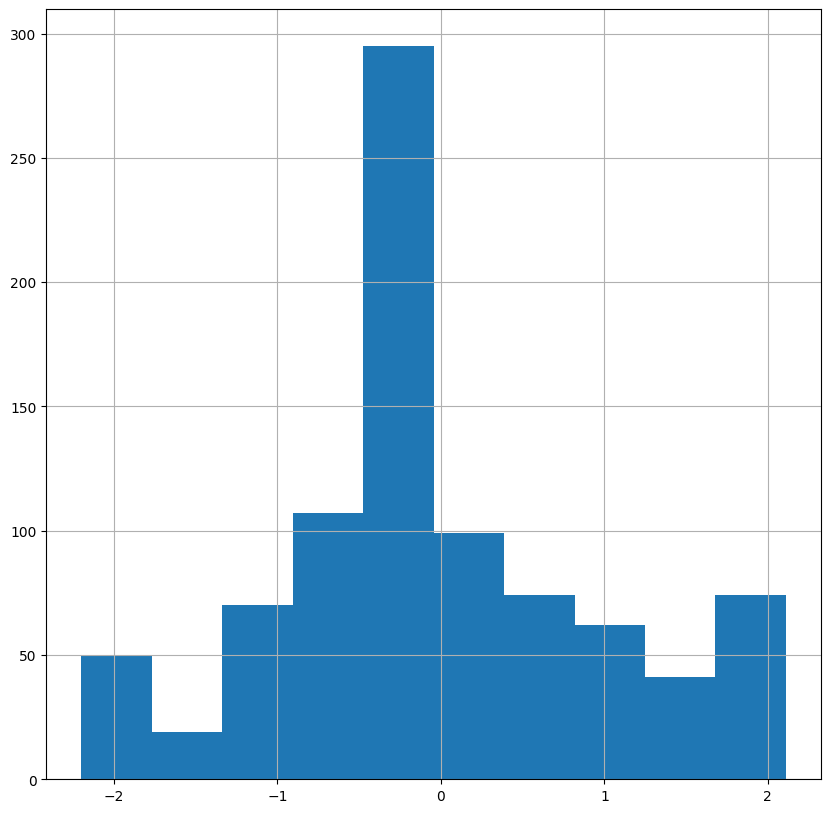

In [ ]:
titanic['age_std'].hist(figsize=(10,10))

<Axes: >

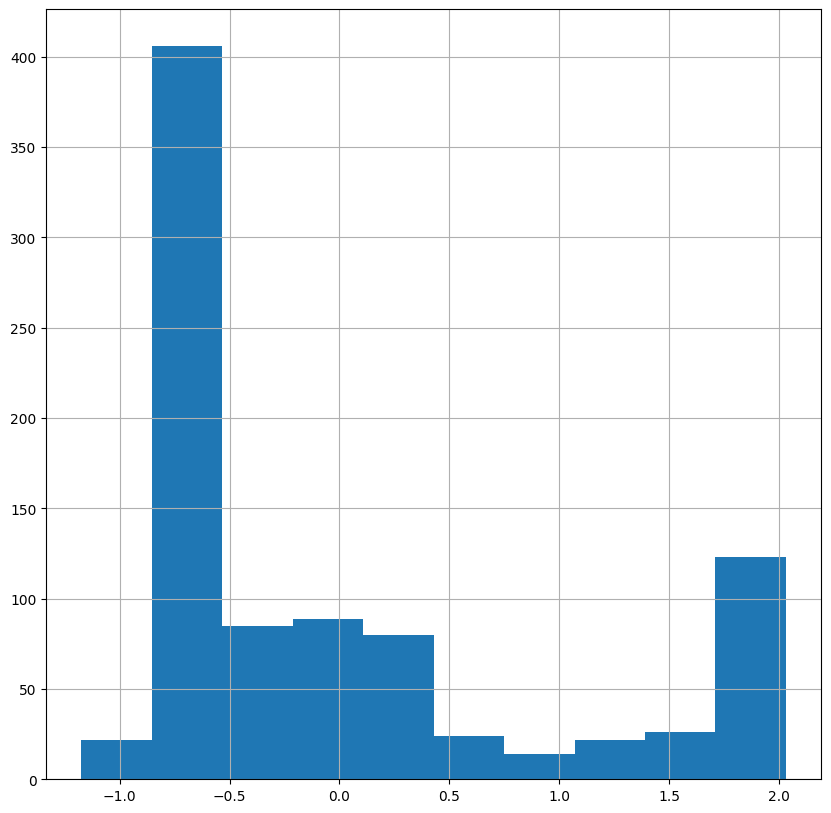

In [ ]:
titanic['fare_std'].hist(figsize=(10,10))

In [ ]:
student_df

,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Major,Performance_Level_ord,Gender_enc,math_score_std,English_Score_std
0,1,Low,Male,75,82,science,0.0,1,-1.241971,-0.691939
1,2,Medium,Female,85,88,arts,1.0,0,0.639803,0.400596
2,3,High,Male,90,95,science,2.0,1,1.580691,1.675221
3,4,Medium,Male,78,79,commerce,1.0,1,-0.677439,-1.238207
4,5,Low,Female,80,85,arts,0.0,0,-0.301084,-0.145671


In [ ]:
new_stud = student_df.drop(['Performance_Level', 'Gender', 'Major'], axis=1)
new_stud

,Student_ID,Math_Score,English_Score,Performance_Level_ord,Gender_enc,math_score_std,English_Score_std
0,1,75,82,0.0,1,-1.241971,-0.691939
1,2,85,88,1.0,0,0.639803,0.400596
2,3,90,95,2.0,1,1.580691,1.675221
3,4,78,79,1.0,1,-0.677439,-1.238207
4,5,80,85,0.0,0,-0.301084,-0.145671


In [ ]:
corr_df = new_stud.corr()
corr_df

,Student_ID,Math_Score,English_Score,Performance_Level_ord,Gender_enc,math_score_std,English_Score_std
Student_ID,1.000000,0.079837,-0.077254,0.000000,-0.288675,0.079837,-0.077254
Math_Score,0.079837,1.000000,0.929269,0.834856,-0.138282,1.000000,0.929269
English_Score,-0.077254,0.929269,1.000000,0.671583,-0.104073,0.929269,1.000000
Performance_Level_ord,0.000000,0.834856,0.671583,1.000000,0.327327,0.834856,0.671583
Gender_enc,-0.288675,-0.138282,-0.104073,0.327327,1.000000,-0.138282,-0.104073
math_score_std,0.079837,1.000000,0.929269,0.834856,-0.138282,1.000000,0.929269
English_Score_std,-0.077254,0.929269,1.000000,0.671583,-0.104073,0.929269,1.000000


Robustscaler
QuantileTransformer
MaxAbsScaler
Normalizer
PowerTransformer

In [ ]:
titanic

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town_n,sex_enc,town_Queenstown,town_Southampton,age_std,fare_std
0,0,0,3,male,22.0,1,0,7.2500,man,0.0,1,0,1,-0.583432,-0.820552
1,1,1,1,female,38.0,1,0,65.6344,woman,1.0,0,0,0,0.742685,2.031623
2,2,1,3,female,26.0,0,0,7.9250,woman,0.0,0,0,1,-0.251903,-0.787578
3,3,1,1,female,35.0,1,0,53.1000,woman,0.0,0,0,1,0.494038,1.419297
4,4,0,3,male,35.0,0,0,8.0500,man,0.0,1,0,1,0.494038,-0.781471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,man,0.0,1,0,1,-0.169020,-0.539655
887,887,1,1,female,19.0,0,0,30.0000,woman,0.0,0,0,1,-0.832079,0.290823
888,888,0,3,female,28.0,1,2,23.4500,woman,0.0,0,0,1,-0.086138,-0.029155
889,889,1,1,male,26.0,0,0,30.0000,man,1.0,1,0,0,-0.251903,0.290823


In [ ]:
new_titanic = titanic.drop(['sex', 'who'], axis=1)
new_titanic

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,embark_town_n,sex_enc,town_Queenstown,town_Southampton,age_std,fare_std
0,0,0,3,22.0,1,0,7.2500,0.0,1,0,1,-0.583432,-0.820552
1,1,1,1,38.0,1,0,65.6344,1.0,0,0,0,0.742685,2.031623
2,2,1,3,26.0,0,0,7.9250,0.0,0,0,1,-0.251903,-0.787578
3,3,1,1,35.0,1,0,53.1000,0.0,0,0,1,0.494038,1.419297
4,4,0,3,35.0,0,0,8.0500,0.0,1,0,1,0.494038,-0.781471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,27.0,0,0,13.0000,0.0,1,0,1,-0.169020,-0.539655
887,887,1,1,19.0,0,0,30.0000,0.0,0,0,1,-0.832079,0.290823
888,888,0,3,28.0,1,2,23.4500,0.0,0,0,1,-0.086138,-0.029155
889,889,1,1,26.0,0,0,30.0000,1.0,1,0,0,-0.251903,0.290823


In [ ]:
corr_titanic = new_titanic.corr()
corr_titanic

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,embark_town_n,sex_enc,town_Queenstown,town_Southampton,age_std,fare_std
Unnamed: 0,1.000000,-0.005007,-0.035144,0.036636,-0.057527,-0.001652,0.003243,-0.027722,0.042939,-0.027482,0.022148,0.036636,0.003243
survived,-0.005007,1.000000,-0.338481,-0.060622,-0.035322,0.081629,0.317430,0.113083,-0.543351,0.008660,-0.155660,-0.060622,0.317430
pclass,-0.035144,-0.338481,1.000000,-0.340404,0.083081,0.018443,-0.715300,0.037256,0.131900,0.213504,0.081720,-0.340404,-0.715300
age,0.036636,-0.060622,-0.340404,1.000000,-0.239601,-0.178959,0.144544,-0.003175,0.074740,-0.026516,-0.012219,1.000000,0.144544
sibsp,-0.057527,-0.035322,0.083081,-0.239601,1.000000,0.414838,0.332021,-0.062233,-0.114631,-0.028085,0.070941,-0.239601,0.332021
parch,-0.001652,0.081629,0.018443,-0.178959,0.414838,1.000000,0.292616,-0.080858,-0.245489,-0.082636,0.063036,-0.178959,0.292616
fare,0.003243,0.317430,-0.715300,0.144544,0.332021,0.292616,1.000000,0.021422,-0.234969,-0.162274,-0.132982,0.144544,1.000000
embark_town_n,-0.027722,0.113083,0.037256,-0.003175,-0.062233,-0.080858,0.021422,1.000000,-0.123271,0.794139,-0.923449,-0.003175,0.021422
sex_enc,0.042939,-0.543351,0.131900,0.074740,-0.114631,-0.245489,-0.234969,-0.123271,1.000000,-0.079067,0.125722,0.074740,-0.234969
town_Queenstown,-0.027482,0.008660,0.213504,-0.026516,-0.028085,-0.082636,-0.162274,0.794139,-0.079067,1.000000,-0.500146,-0.026516,-0.162274


In [ ]:
titanic


,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town_n,sex_enc,town_Queenstown,town_Southampton,age_std,fare_std
0,0,0,3,male,22.0,1,0,7.2500,man,0.0,1,0,1,-0.583432,-0.820552
1,1,1,1,female,38.0,1,0,65.6344,woman,1.0,0,0,0,0.742685,2.031623
2,2,1,3,female,26.0,0,0,7.9250,woman,0.0,0,0,1,-0.251903,-0.787578
3,3,1,1,female,35.0,1,0,53.1000,woman,0.0,0,0,1,0.494038,1.419297
4,4,0,3,male,35.0,0,0,8.0500,man,0.0,1,0,1,0.494038,-0.781471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,man,0.0,1,0,1,-0.169020,-0.539655
887,887,1,1,female,19.0,0,0,30.0000,woman,0.0,0,0,1,-0.832079,0.290823
888,888,0,3,female,28.0,1,2,23.4500,woman,0.0,0,0,1,-0.086138,-0.029155
889,889,1,1,male,26.0,0,0,30.0000,man,1.0,1,0,0,-0.251903,0.290823


In [ ]:
y = new_titanic['survived']
x = new_titanic.drop(columns=['survived'])

In [ ]:
x

,Unnamed: 0,pclass,age,sibsp,parch,fare,embark_town_n,sex_enc,town_Queenstown,town_Southampton,age_std,fare_std
0,0,3,22.0,1,0,7.2500,0.0,1,0,1,-0.583432,-0.820552
1,1,1,38.0,1,0,65.6344,1.0,0,0,0,0.742685,2.031623
2,2,3,26.0,0,0,7.9250,0.0,0,0,1,-0.251903,-0.787578
3,3,1,35.0,1,0,53.1000,0.0,0,0,1,0.494038,1.419297
4,4,3,35.0,0,0,8.0500,0.0,1,0,1,0.494038,-0.781471
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,2,27.0,0,0,13.0000,0.0,1,0,1,-0.169020,-0.539655
887,887,1,19.0,0,0,30.0000,0.0,0,0,1,-0.832079,0.290823
888,888,3,28.0,1,2,23.4500,0.0,0,0,1,-0.086138,-0.029155
889,889,1,26.0,0,0,30.0000,1.0,1,0,0,-0.251903,0.290823


In [ ]:
y

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,Unnamed: 0,pclass,age,sibsp,parch,fare,embark_town_n,sex_enc,town_Queenstown,town_Southampton,age_std,fare_std
331,331,1,45.5,0,0,28.5000,0.0,1,0,1,1.364303,0.217546
733,733,2,23.0,0,0,13.0000,0.0,1,0,1,-0.500550,-0.539655
382,382,3,32.0,0,0,7.9250,0.0,1,0,1,0.245391,-0.787578
704,704,3,26.0,1,0,7.8542,0.0,1,0,1,-0.251903,-0.791036
813,813,3,6.0,4,2,31.2750,0.0,0,0,1,-1.909549,0.353109


In [ ]:
x_train.shape

(712, 12)

In [ ]:
y_train.head()

,survived
331,0
733,0
382,0
704,0
813,0


In [ ]:
y_train.shape

(712,)

In [ ]:
x_test.head()

,Unnamed: 0,pclass,age,sibsp,parch,fare,embark_town_n,sex_enc,town_Queenstown,town_Southampton,age_std,fare_std
709,709,3,28.0,1,1,15.2458,1.0,1,0,0,-0.086138,-0.429944
439,439,2,31.0,0,0,10.5000,0.0,1,0,1,0.162509,-0.661785
840,840,3,20.0,0,0,7.9250,0.0,1,0,1,-0.749197,-0.787578
720,720,2,6.0,0,1,33.0000,0.0,0,0,1,-1.909549,0.437378
39,39,3,14.0,1,0,11.2417,1.0,0,0,0,-1.246491,-0.625551


In [ ]:
x_test.shape


(179, 12)

In [ ]:
y_test.shape


(179,)

In [ ]:
y_test.head()

,survived
709,1
439,0
840,0
720,1
39,1


In [ ]:
 import seaborn as sns
iris = sns.load_dataset("iris")

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_df = pd.get_dummies(iris,
                                columns = ['species'],
                                prefix='n-',
                                dtype='int64')

In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,n-_setosa,n-_versicolor,n-_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
std_scaler = StandardScaler()
min_scaler = MinMaxScaler()

iris_df['sepal_length_std']=std_scaler.fit_transform(iris_df[['sepal_length']])


In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,n-_setosa,n-_versicolor,n-_virginica,sepal_length_std
0,5.1,3.5,1.4,0.2,1,0,0,-0.900681
1,4.9,3.0,1.4,0.2,1,0,0,-1.143017
2,4.7,3.2,1.3,0.2,1,0,0,-1.385353
3,4.6,3.1,1.5,0.2,1,0,0,-1.506521
4,5.0,3.6,1.4,0.2,1,0,0,-1.021849
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1,1.038005
146,6.3,2.5,5.0,1.9,0,0,1,0.553333
147,6.5,3.0,5.2,2.0,0,0,1,0.795669
148,6.2,3.4,5.4,2.3,0,0,1,0.432165


In [ ]:
corr_df_iris = iris_df.corr()
corr_df_iris

,sepal_length,sepal_width,petal_length,petal_width,n-_setosa,n-_versicolor,n-_virginica,sepal_length_std
sepal_length,1.000000,-0.117570,0.871754,0.817941,-0.717416,0.079396,0.638020,1.000000
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.603348,-0.467703,-0.135645,-0.117570
petal_length,0.871754,-0.428440,1.000000,0.962865,-0.922765,0.201754,0.721011,0.871754
petal_width,0.817941,-0.366126,0.962865,1.000000,-0.887344,0.117899,0.769445,0.817941
n-_setosa,-0.717416,0.603348,-0.922765,-0.887344,1.000000,-0.500000,-0.500000,-0.717416
n-_versicolor,0.079396,-0.467703,0.201754,0.117899,-0.500000,1.000000,-0.500000,0.079396
n-_virginica,0.638020,-0.135645,0.721011,0.769445,-0.500000,-0.500000,1.000000,0.638020
sepal_length_std,1.000000,-0.117570,0.871754,0.817941,-0.717416,0.079396,0.638020,1.000000


In [ ]:
y_iris = iris['species']
x_iris = iris.drop(columns=['species'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_iris,x_iris,test_size=0.3,random_state=42)

In [ ]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [ ]:
x_train.shape

(105, 4)

In [ ]:
y_train.head()

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [ ]:
y_train.shape

(105, 4)

In [ ]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [ ]:
x_test.shape

(45, 4)

In [ ]:
 y_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [ ]:
 y_test.shape

(45, 4)

In [ ]:
print("""Collect & Load the Data
Explore Data (EDA)
      Look at structure: df.info(), df.describe()
      Check missing values: df.isnull().sum()
      Look for outliers: boxplots, histograms
      Correlation: df.corr()
Preprocess the Data
        Handle Missing Values
                Numeric: mean/median
                Categorical: mode
                Or advanced imputers
        Handle Outliers
              Remove or transform using IQR, log transform
        Encode Categorical Variables
                OneHotEncoder for nominal
                OrdinalEncoder for ordered
        Scale/Normalize Numeric Variables
              StandardScaler, MinMaxScaler, or RobustScaler
Feature Selection / Engineering
        Drop irrelevant features
        Create new features if useful
Split Data
Choose and build the model""")

Collect & Load the Data
Explore Data (EDA)
      Look at structure: df.info(), df.describe()
      Check missing values: df.isnull().sum()
      Look for outliers: boxplots, histograms
      Correlation: df.corr()
Preprocess the Data
        Handle Missing Values
                Numeric: mean/median
                Categorical: mode
                Or advanced imputers
        Handle Outliers
              Remove or transform using IQR, log transform
        Encode Categorical Variables
                OneHotEncoder for nominal
                OrdinalEncoder for ordered
        Scale/Normalize Numeric Variables
              StandardScaler, MinMaxScaler, or RobustScaler
Feature Selection / Engineering
        Drop irrelevant features
        Create new features if useful
Split Data
Choose and build the model
